In [53]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


In [54]:
data = pd.read_csv("assessment_da25.csv")

Next, I add new columns for the defined metrics:

In [55]:
data["CTR"] = data["Clicks on media"] / data["Number of page views"]


In [56]:
data["Conversion rate"] = data["Number of add to cart"] / data["Number of page views"]


I need to filter data for each variant.

In [57]:
variant_a = data[data["Variant"] == "A"]
variant_b = data[data["Variant"] == "B"]


Let's visualise CTR!

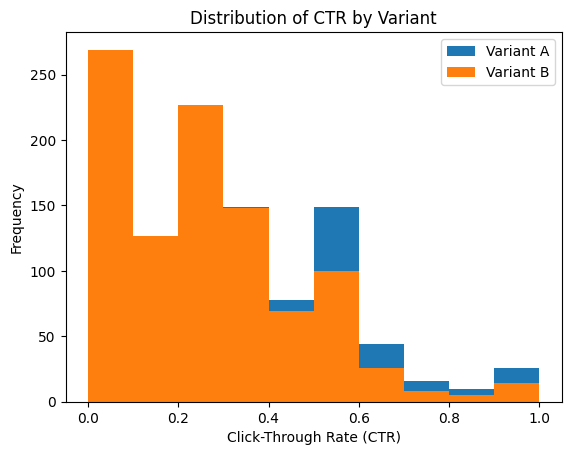

In [58]:
plt.hist(variant_a["CTR"], label="Variant A")
plt.hist(variant_b["CTR"], label="Variant B")
plt.legend()
plt.xlabel("Click-Through Rate (CTR)")
plt.ylabel("Frequency")
plt.title("Distribution of CTR by Variant")
plt.show()

I use Levene's test for homogeneity of variances to determine the appropriate t-test.

In [59]:
levene_statistic, p_value_levene = stats.levene(variant_a["CTR"], variant_b["CTR"])

if p_value_levene < 0.05:
    print("Unequal variances detected. Using Welch's t-test.")
else:
    print("Equal variances assumed. Using ttest_ind.")


Equal variances assumed. Using ttest_ind.


Independent t-test is apt. Let's take care of divide by zeros...

In [60]:
variant_a_filtered = variant_a[variant_a["Number of page views"] > 0]
variant_b_filtered = variant_b[variant_b["Number of page views"] > 0]

variant_a_filtered.loc[:, "CTR"] = variant_a_filtered["Clicks on media"] / variant_a_filtered["Number of page views"]
variant_b_filtered.loc[:, "CTR"] = variant_b_filtered["Clicks on media"] / variant_b_filtered["Number of page views"]

time for t-test!

In [61]:
t_statistic, p_value = stats.ttest_ind(variant_a_filtered["CTR"], variant_b_filtered["CTR"], equal_var=True)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject null hypothesis. Statistically significant difference in CTR between variants.")
else:
    print("Fail to reject null hypothesis. No statistically significant difference in CTR.")


t-statistic: 5.377228087459435
p-value: 8.455180218008184e-08
Reject null hypothesis. Statistically significant difference in CTR between variants.


Great! let's now move on to the secondary metric aka conversion rate. It's time to repeat!

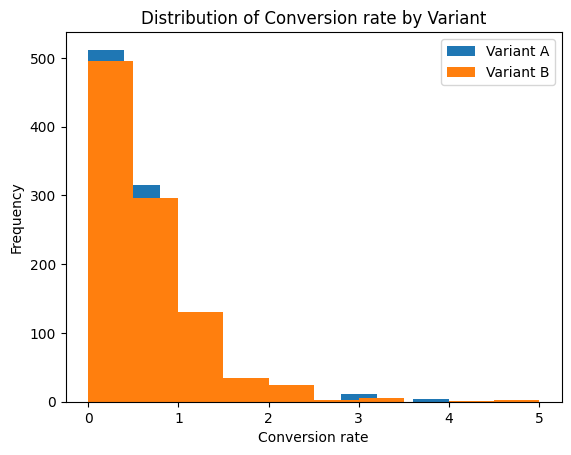

In [62]:
plt.hist(variant_a["Conversion rate"], label="Variant A")
plt.hist(variant_b["Conversion rate"], label="Variant B")
plt.legend()
plt.xlabel("Conversion rate")
plt.ylabel("Frequency")
plt.title("Distribution of Conversion rate by Variant")
plt.show()

In [63]:
levene_statistic, p_value_levene = stats.levene(variant_a["Conversion rate"], variant_b["Conversion rate"])

if p_value_levene < 0.05:
    print("Unequal variances detected. Using Welch's t-test.")
else:
    print("Equal variances assumed. Using ttest_ind.")


Equal variances assumed. Using ttest_ind.


In [64]:
variant_a_filtered = variant_a[variant_a["Number of page views"] > 0]
variant_b_filtered = variant_b[variant_b["Number of page views"] > 0]

variant_a_filtered.loc[:, "Conversion rate"] = variant_a_filtered["Number of add to cart"] / variant_a_filtered["Number of page views"]
variant_b_filtered.loc[:, "Conversion rate"] = variant_b_filtered["Number of add to cart"] / variant_b_filtered["Number of page views"]

In [65]:
t_statistic, p_value = stats.ttest_ind(variant_a_filtered["CTR"], variant_b_filtered["CTR"], equal_var=True)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject null hypothesis. Statistically significant difference in CTR between variants.")
else:
    print("Fail to reject null hypothesis. No statistically significant difference in CTR.")


t-statistic: 5.377228087459435
p-value: 8.455180218008184e-08
Reject null hypothesis. Statistically significant difference in CTR between variants.


In [67]:
data.head()

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id,CTR,Conversion rate
0,A,5,0.0,0,2,74,0,0.40,0.0
1,A,4,0.0,4,1,21,1,0.25,1.0
2,A,4,0.0,2,0,1,2,0.00,0.5
3,A,5,0.0,0,1,26,3,0.20,0.0
4,A,5,0.0,3,3,46,4,0.60,0.6


In [68]:
levene_statistic, p_value_levene = stats.levene(variant_a["Time on Page (sec)"], variant_b["Time on Page (sec)"])

if p_value_levene < 0.05:
    print("Unequal variances detected. Using Welch's t-test.")
else:
    print("Equal variances assumed. Using ttest_ind.")

Equal variances assumed. Using ttest_ind.


In [69]:
t_statistic, p_value = stats.ttest_ind(variant_a_filtered["Time on Page (sec)"], variant_b_filtered["Time on Page (sec)"], equal_var=True)

print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

if p_value < 0.05:
    print("Reject null hypothesis. Statistically significant difference in CTR between variants.")
else:
    print("Fail to reject null hypothesis. No statistically significant difference in CTR.")


t-statistic: 0.41279131309731887
p-value: 0.679804075145372
Fail to reject null hypothesis. No statistically significant difference in CTR.
